# Grupo C2 

* Questão A
Desenvolvida ao longo do notebook


* Questão B

As bolhas de cores diferentes representam, cada uma delas, os 5 continentes. Podemos verificar a evolução, entre 1952 e 2007 e de 5 em e anos, da esperança de vida nos diferentes continentes.

Começamos por agrupar os continentes por categorias usando o codigo
data['continent']=pd.Categorical(data['continent'])

depois definimos as cores, conforme agrupadas pelas categorias anterirmente, com o código
c=tmp['continent'].cat.codes 

Atribuímos um mapa de cores
cmap="Accent"

definimos transparências 
alpha=0.6

e a cor limite da bolhas para branco
edgecolors="white"


* Questão C
Para inserir a legenda, foi agrupado primeiro os continentes usando codigo c = data.continent.unique
A legenda foi criada através do método legend_elements(). Usamos handles e labels_ para determinar as entradas com sequencias ordenadas. Para bloquear a legenda no canto superior esquerdo usámos loc(2) e inserida um tituilo para a legenda usando title=

legendContinentes= ax.legend(handles =scut.legend_elements () [0], labels = c, loc=(2), title= "Continentes")

In [226]:
#Para analisar e trabalhar os dados, é preciso importar as bibliotecas necessárias
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [227]:
#É preciso criar uma dataframe com os dados que serão trabalhados. O ficheiro CSV que se encontra alojado na WEB e conhecer que dados constam nessa tabela de dados
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#mostrar os 1ºs 5 dados para perceber que tipo de dados existem no CSV
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [228]:
#Passo seguinte, agrupar, através de Categorical, a categoria da coluna Continent, dando num valor numerico.
data['continent']=pd.Categorical(data['continent'])

In [229]:
#definir valor unico para ano, para que nao apareçam anos repetidos.
anos=data.year.unique()


<IPython.core.display.Javascript object>


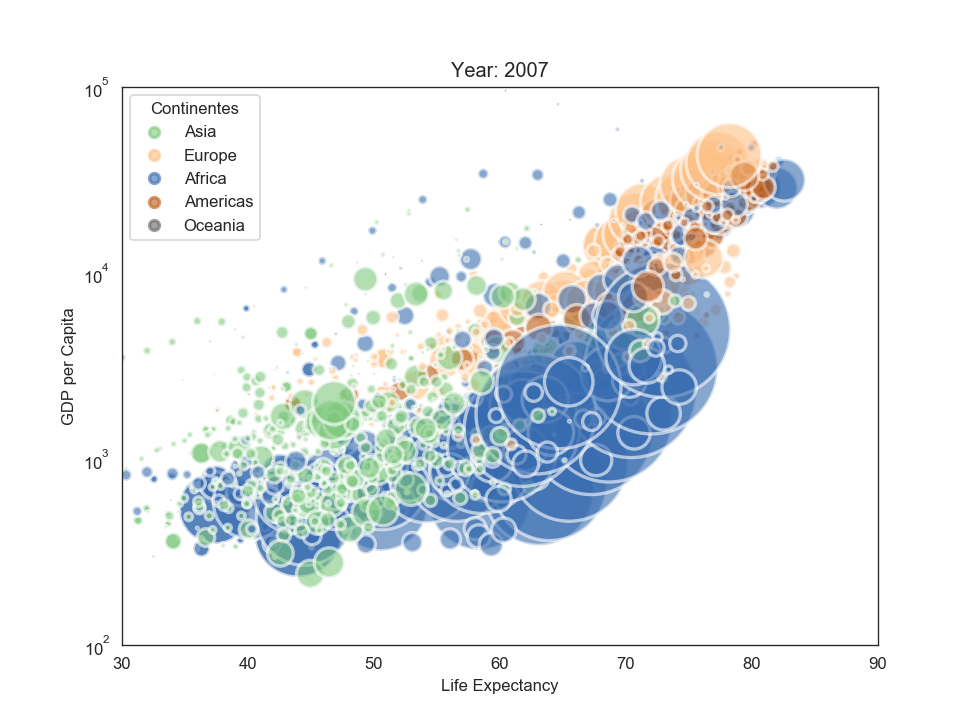

In [240]:
%matplotlib notebook
%matplotlib notebook
c = data.continent.unique()

# Inicio do mapa com .figure, definindo as medidas limites da figura usando figsizedo a escala,  dos titulos e dos eixos.

fig, ax = plt.subplots(figsize=(780/my_dpi, 580/my_dpi), dpi=my_dpi)

# Definimos os parametros como etiquetas títulos, dos eixos, e limites a apresentar

plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)


#Depois foi defina a animação: Criado o titulo do grafico, cujo ano vai mudando à medida que os dados são lidos, usando +str(anos)[i], 
#É atribuida gama de cores conforme os grupos e definida a palete de cores (c=tmp['continent'].cat.codes, cmap="Accent"), a transparencia (alpha=0.6), a cor da linha limite das bolhas (edgecolors="white") e a espessura da linha (linewidth) 
def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
             
  
    legendContinentes= ax.legend(handles =scut.legend_elements () [0], labels = c, loc=(2), title= "Continentes")

# Foi criada a variável "ani". Recorremos à biblioteca animation e usando .FuncAnimation(), criámos uma animação com base na função definada como animate,
# definimos o o nº de frames da animação como sendo igual ao nº de anos e o intervalo entre frames é definido para 200 milissegundos e sem que o gif se repita

ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)

# mostrar o grafico animado através show
plt.show()